In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Project 5: Resizing, Interpolation, and Cropping **(E-commerce Product Image Preparation)**

---

### 5.1 Overview

In this project, we prepare a **product image** for use on an **e-commerce website**.  
E-commerce platforms usually require images to have:
- Standard dimensions
- A square aspect ratio
- High visual quality at different resolutions

We will:
- Resize an image to **512 × 512**
- Crop the image to **center the product** in a perfect square
- Create a **thumbnail (128 × 128)**
- Compare **different interpolation methods**

### 5.2 Step 1: Load and Display the Product Image

Original size: 900 x 900


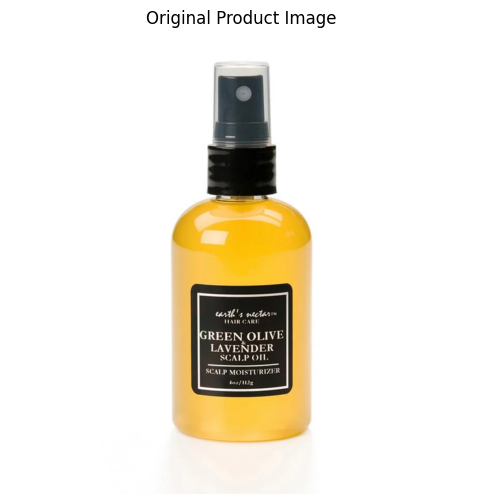

In [2]:
# Load product image
image = cv2.imread("./images/product.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get original dimensions
height, width = image_rgb.shape[:2]

# Display original image
plt.figure(figsize=(8, 6))
plt.title("Original Product Image")
plt.axis("off")
plt.imshow(image_rgb)


print(f"Original size: {width} x {height}")

### 5.3 Step 2: Resize Image to 512 × 512

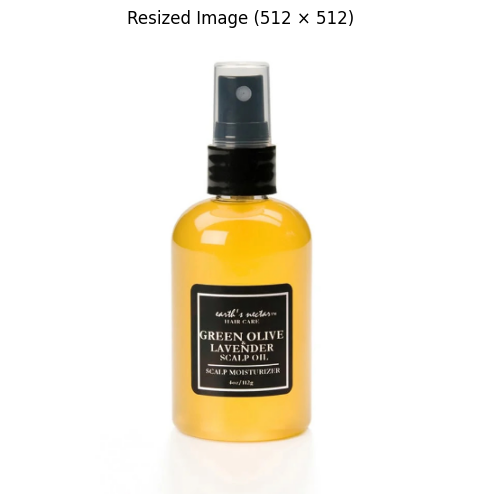

In [3]:
resized_512 = cv2.resize(image_rgb, (512, 512), interpolation=cv2.INTER_LINEAR)
plt.figure(figsize=(6, 6))
plt.title("Resized Image (512 × 512)")
plt.axis("off")
plt.imshow(resized_512)

### 5.3 Step 3: Center Crop to a Perfect Square

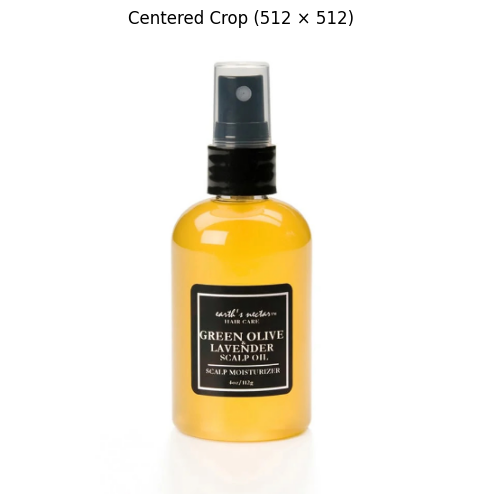

In [4]:
# Find the shortest side
min_side = min(height, width)

# Compute image center
center_x = width // 2
center_y = height // 2

# Compute crop coordinates
start_x = center_x - min_side // 2
start_y = center_y - min_side // 2

# Perform center crop
cropped_square = image_rgb[
    start_y:start_y + min_side,
    start_x:start_x + min_side
]
cropped_resized_512 = cv2.resize(cropped_square, (512, 512))

plt.figure(figsize=(6, 6))
plt.imshow(cropped_resized_512)
plt.title("Centered Crop (512 × 512)")
plt.axis("off")
plt.show()

### 5.4 Step 4: Create a Thumbnail (128 × 128)

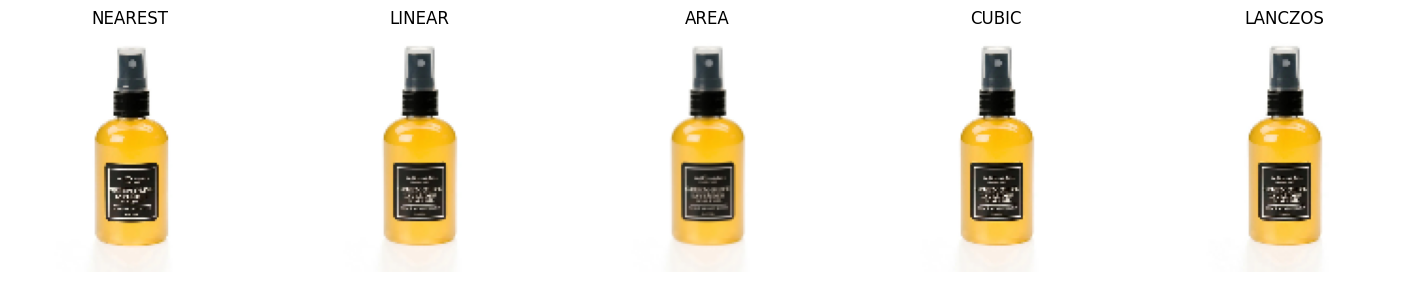

In [5]:
interpolations = {
    "NEAREST": cv2.INTER_NEAREST,
    "LINEAR": cv2.INTER_LINEAR,
    "AREA": cv2.INTER_AREA,
    "CUBIC": cv2.INTER_CUBIC,
    "LANCZOS": cv2.INTER_LANCZOS4
}

fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for ax, (name, method) in zip(axes, interpolations.items()):
    thumb = cv2.resize(
        cropped_resized_512,
        (128, 128),
        interpolation=method
    )
    ax.set_title(name)
    ax.axis("off")
    ax.imshow(thumb)